In [1]:
import os
import pandas as pd
import face_recognition
import matplotlib.pyplot as plt
import cv2
import numpy as np

ruta_carpeta_inicial = '/home/waldos/Documents/2doCodigo/TopicoIA/BD/corpus_images_1'

Primero inspeccionamos la carpeta y todas las fotos le extraemos las caracteristicas del rostro. Las asignamos en 4 categorias

In [36]:
#Crear lista para almacenar datos de imagenes
directorio = []

for nombre_carpeta in os.listdir(ruta_carpeta_inicial):
    ruta_carpeta = os.path.join(ruta_carpeta_inicial, nombre_carpeta)
    if os.path.isdir(ruta_carpeta):
        for nombre_archivo in os.listdir(ruta_carpeta):
            try:
                ruta_archivo = os.path.join(ruta_carpeta, nombre_archivo)
                imagen_BGR = cv2.imread(ruta_archivo)

                imagen_Gray = cv2.cvtColor(imagen_BGR, cv2.COLOR_BGR2GRAY)

                imagen_redimensionada = cv2.resize(imagen_Gray,(150,150))

                caracteristicas_faciales = face_recognition.face_landmarks(imagen_redimensionada)
                
                arriba,derecha,abajo,izquierda = face_recognition.face_locations(imagen_redimensionada)[0]

                cara_recortada = imagen_redimensionada[arriba:abajo, izquierda:derecha]
                directorio.append([imagen_redimensionada, caracteristicas_faciales[0], cara_recortada, nombre_carpeta])
                #for rostro, landmark in zip(cara_recortada,caracteristicas_faciales):
                  #  directorio.append([imagen_redimensionada, landmark, cara_recortada, nombre_carpeta])
                

            except Exception as e:
                print("Error en archivo:"+str(nombre_archivo)+":"+str(e))
print(directorio[0][1])

{'chin': [(47, 65), (47, 71), (47, 77), (48, 83), (50, 89), (52, 96), (55, 101), (60, 105), (67, 106), (74, 105), (79, 101), (83, 96), (85, 90), (87, 84), (88, 78), (89, 71), (89, 65)], 'left_eyebrow': [(50, 56), (52, 52), (55, 50), (59, 49), (63, 50)], 'right_eyebrow': [(71, 50), (75, 49), (79, 49), (83, 52), (84, 56)], 'nose_bridge': [(67, 57), (67, 62), (67, 67), (67, 72)], 'nose_tip': [(63, 77), (65, 77), (67, 78), (70, 77), (72, 76)], 'left_eye': [(54, 61), (56, 60), (59, 60), (61, 61), (59, 61), (56, 62)], 'right_eye': [(73, 60), (76, 59), (78, 60), (81, 61), (78, 61), (76, 61)], 'top_lip': [(58, 87), (61, 85), (65, 83), (68, 84), (70, 83), (73, 85), (77, 87), (75, 87), (70, 86), (68, 87), (65, 86), (60, 87)], 'bottom_lip': [(77, 87), (74, 89), (70, 91), (67, 91), (64, 91), (61, 90), (58, 87), (60, 87), (65, 87), (67, 87), (70, 87), (75, 87)]}


Creamos el Dataset en formato Pandas

In [37]:
columnas = ['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta']
df = pd.DataFrame(directorio, columns=columnas)
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","{'chin': [(47, 65), (47, 71), (47, 77), (48, 8...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",focused
1,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","{'chin': [(47, 65), (47, 71), (47, 77), (48, 8...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",relaxed
2,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","{'chin': [(47, 65), (47, 71), (47, 77), (48, 8...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",excited
3,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","{'chin': [(47, 65), (47, 71), (47, 77), (48, 8...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",engaged
4,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","{'chin': [(47, 65), (47, 71), (47, 77), (48, 8...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",interested


In [15]:
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","{'chin': [(47, 65), (47, 71), (47, 77), (48, 8...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",focused
1,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","{'chin': [(47, 65), (47, 71), (47, 77), (48, 8...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",relaxed
2,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","{'chin': [(47, 65), (47, 71), (47, 77), (48, 8...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",excited
3,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","{'chin': [(47, 65), (47, 71), (47, 77), (48, 8...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",engaged
4,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","{'chin': [(47, 65), (47, 71), (47, 77), (48, 8...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",interested


In [27]:
df2 = df.copy()
df2.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","{'chin': [(47, 65), (47, 71), (47, 77), (48, 8...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",focused
1,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","{'chin': [(47, 65), (47, 71), (47, 77), (48, 8...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",relaxed
2,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","{'chin': [(47, 65), (47, 71), (47, 77), (48, 8...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",excited
3,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","{'chin': [(47, 65), (47, 71), (47, 77), (48, 8...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",engaged
4,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","{'chin': [(47, 65), (47, 71), (47, 77), (48, 8...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",interested


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Imagen           6 non-null      object
 1   Caracteristicas  6 non-null      object
 2   Rostro           6 non-null      object
 3   Etiqueta         6 non-null      object
dtypes: object(4)
memory usage: 320.0+ bytes


In [29]:
etiquetas_distintas = df['Etiqueta'].unique()

# Mostrar las etiquetas distintas
print("Etiquetas distintas en la columna 'Etiqueta':")
for etiqueta in etiquetas_distintas:
    print(etiqueta)

Etiquetas distintas en la columna 'Etiqueta':
focused
relaxed
excited
engaged
interested
bored


Tranformamos de directorios a Numpy la columna de caracteristicas

In [38]:
def extract_facial_landmarks(face_landmarks):
    """
    Toma un diccionario almacenado en la columna 'Landmarks' y elimina las keys,
    dejando solo las coordenadas de donde se encuentran los puntos faciales.
    """
    landmarks = []
    for facial_feature in face_landmarks.keys():
        landmarks.extend(face_landmarks[facial_feature])
    return np.array(landmarks)
df['Caracteristicas'] = df['Caracteristicas'].apply(extract_facial_landmarks)

In [39]:
# Reiniciar los índices
df = df.reset_index(drop=True)

In [32]:
# Función para transformar los Landmarks a numpy arrays
def landmarks_to_array(landmarks_list):
    return np.array(landmarks_list)

# Aplicar la función a la columna 'Landmarks' y sobrescribir los valores
df['Caracteristicas'] = df['Caracteristicas'].apply(landmarks_to_array)

In [40]:
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","[[47, 65], [47, 71], [47, 77], [48, 83], [50, ...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",focused
1,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","[[47, 65], [47, 71], [47, 77], [48, 83], [50, ...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",relaxed
2,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","[[47, 65], [47, 71], [47, 77], [48, 83], [50, ...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",excited
3,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","[[47, 65], [47, 71], [47, 77], [48, 83], [50, ...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",engaged
4,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","[[47, 65], [47, 71], [47, 77], [48, 83], [50, ...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",interested


In [35]:
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","[[47, 65], [47, 71], [47, 77], [48, 83], [50, ...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",focused
1,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","[[47, 65], [47, 71], [47, 77], [48, 83], [50, ...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",relaxed
2,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","[[47, 65], [47, 71], [47, 77], [48, 83], [50, ...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",excited
3,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","[[47, 65], [47, 71], [47, 77], [48, 83], [50, ...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",engaged
4,"[[174, 174, 174, 174, 176, 175, 175, 176, 176,...","[[47, 65], [47, 71], [47, 77], [48, 83], [50, ...","[[176, 177, 177, 177, 121, 34, 51, 86, 93, 92,...",interested


Vemos el tamaño (shape) en los cuales está el Dataset

In [41]:
print(df['Imagen'][0].shape)
print(df['Caracteristicas'][0].shape)
print(df['Rostro'][0].shape)

(150, 150)
(72, 2)
(51, 52)


Guardar el dataset

In [32]:
#df.to_hdf('BD_Emotions_Mod.h5', key='dataframe', mode = 'w')

/tmp/ipykernel_130587/1409423780.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Imagen', 'Caracteristicas', 'Rostro', 'Etiqueta'], dtype='object')]

  df.to_hdf('BD_Emotions_Mod.h5', key='dataframe', mode = 'w')


Leer archivo creado

In [33]:
import pandas as pd
df_HDF = pd.read_hdf('BD_Emotions_Mod.h5')

In [34]:
print(df_HDF.shape[1])

4


In [35]:
df_HDF.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[181, 181, 181, 181, 182, 182, 181, 182, 182,...","[[60, 68], [60, 74], [61, 80], [62, 86], [65, ...","[[27, 25, 33, 28, 19, 23, 33, 22, 23, 42, 79, ...",focused
1,"[[165, 165, 166, 165, 167, 166, 166, 166, 166,...","[[55, 59], [55, 65], [56, 72], [57, 78], [59, ...","[[165, 16, 8, 46, 13, 11, 8, 13, 32, 73, 93, 1...",focused
2,"[[162, 163, 162, 162, 163, 162, 162, 162, 162,...","[[56, 74], [56, 81], [58, 89], [59, 96], [62, ...","[[17, 18, 15, 23, 38, 67, 87, 96, 95, 102, 102...",focused
3,"[[167, 167, 167, 167, 169, 167, 167, 168, 168,...","[[59, 83], [59, 90], [59, 97], [60, 104], [61,...","[[173, 149, 16, 13, 13, 12, 31, 68, 91, 96, 10...",focused
4,"[[171, 169, 170, 168, 171, 172, 170, 170, 171,...","[[50, 67], [50, 74], [51, 81], [52, 88], [53, ...","[[171, 171, 170, 168, 52, 16, 8, 5, 8, 27, 72,...",focused


Impresión de los datos para verlos gŕaficamente

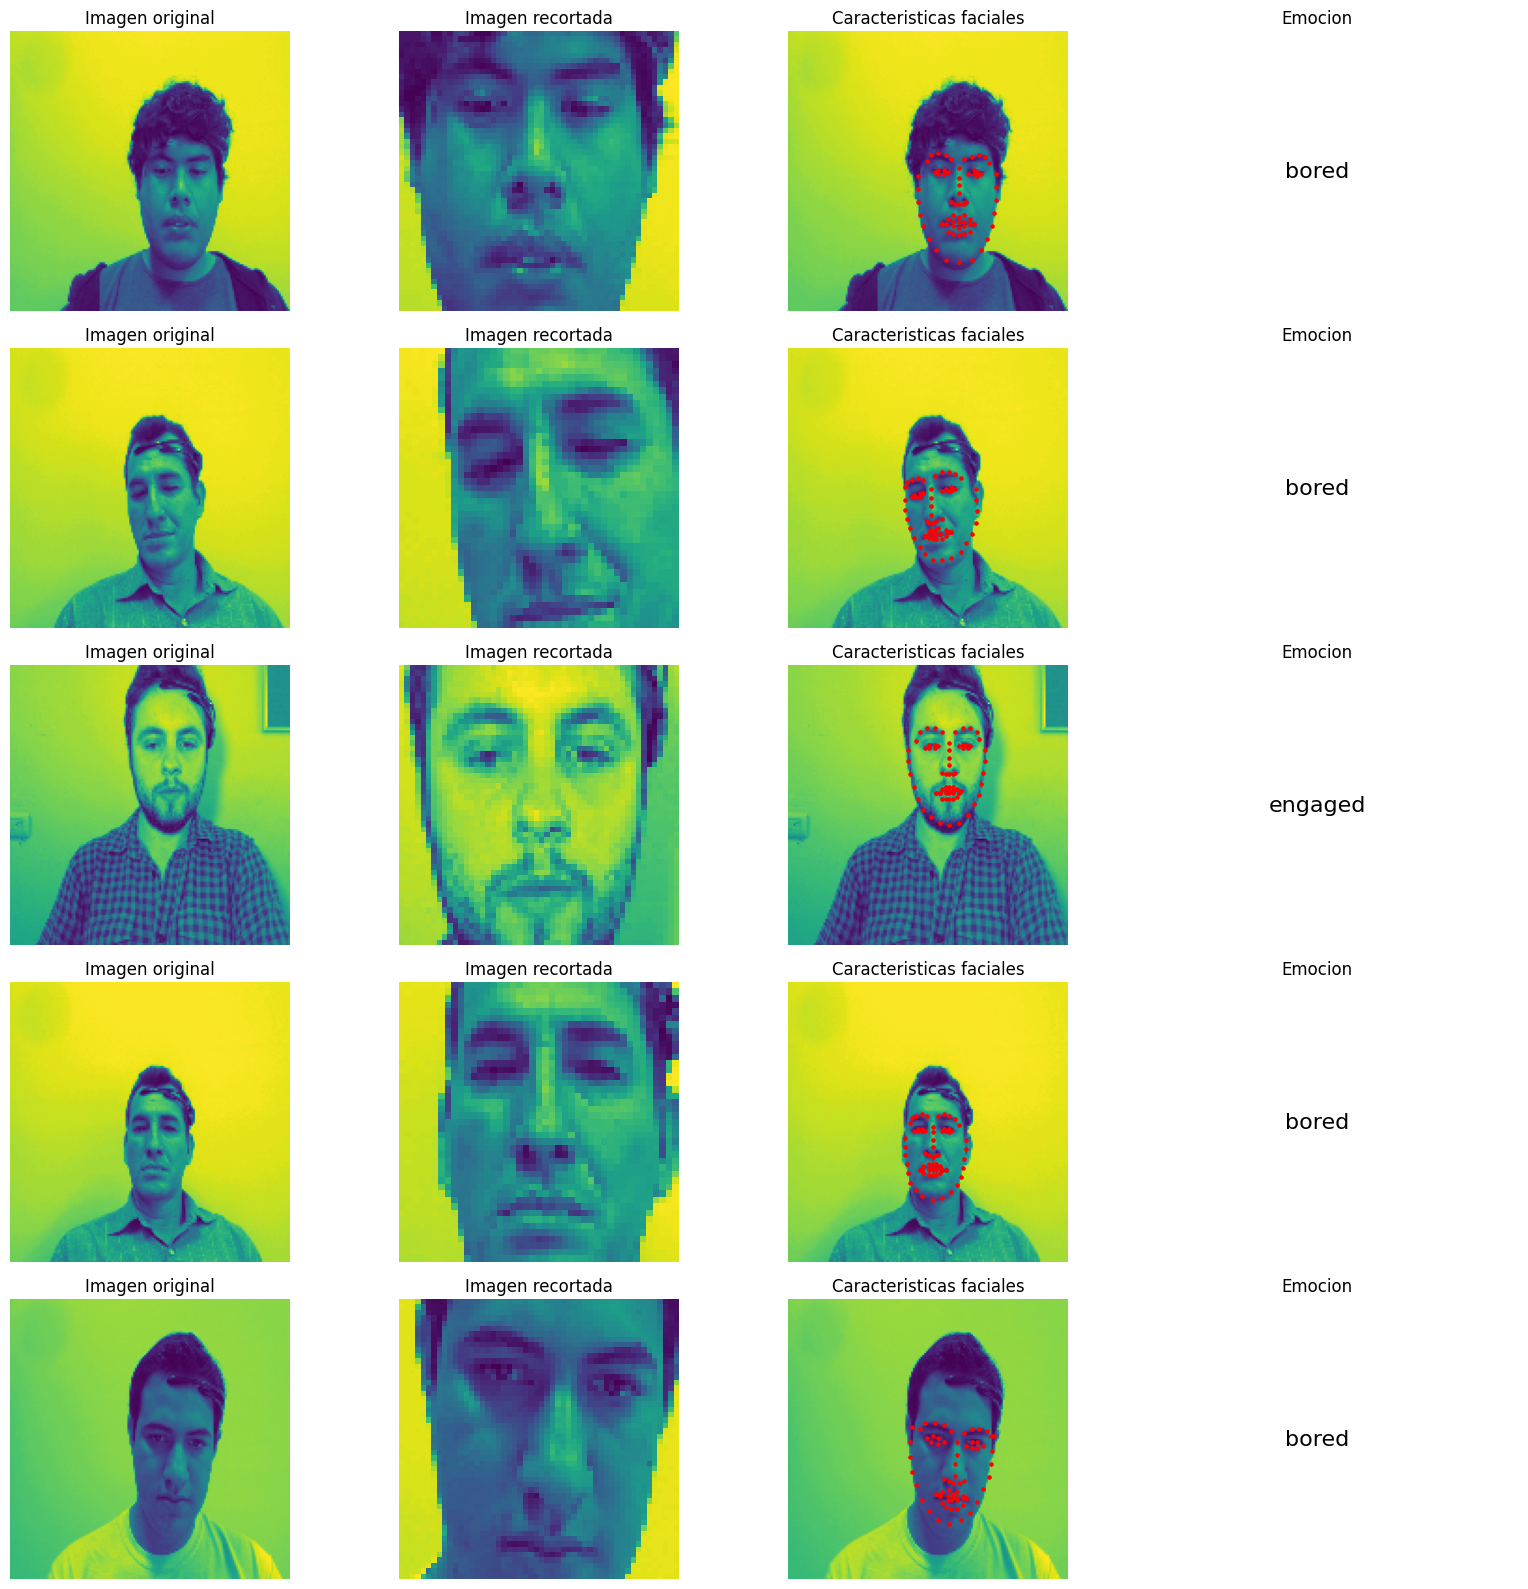

In [37]:
import matplotlib.pyplot as plt

df_ejemploHDF = df_HDF.sample(n=5)
columnas_dfHDF = df_HDF.shape[1]

fig, axes = plt.subplots(nrows = len(df_ejemploHDF), ncols=columnas_dfHDF, figsize=(16,16))

for i, (index, row) in enumerate(df_ejemploHDF.iterrows()):
    ax0 = axes[i,0]
    ax0.imshow(row['Imagen'])
    ax0.set_title('Imagen original')
    ax0.axis('off')

    ax1 = axes[i,1]
    ax1.imshow(row['Rostro'])
    ax1.set_title('Imagen recortada')
    ax1.axis('off')

    ax2 = axes[i,2]
    ax2.imshow(row['Imagen'])

    for caracteristicas in row['Caracteristicas']:
        ax2.plot(caracteristicas[0], caracteristicas[1], marker= 'o', markersize = 2, color='red')

    ax2.set_title('Caracteristicas faciales')
    ax2.axis('off')

    ax3 = axes[i,3]

    ax3.text(0.5, 0.5, row['Etiqueta'], horizontalalignment= 'center',verticalalignment='center',fontsize=16)
    ax3.set_title('Emocion')
    ax3.axis('off')
plt.tight_layout()
plt.show()
    
    
    